In [1]:
using JLD, PyPlot

In [2]:
archivo="/home/karel/Downloads/LFP_Promedio_est_con6.jld"

"/home/karel/Downloads/LFP_Promedio_est_con6.jld"

In [14]:
archivo2="../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_con6.jld"

"../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_con6.jld"

In [3]:
Arxivo=load(archivo)

Dict{String,Any} with 12 entries:
  "KTT_KInv"         => [0.0590107 0.0455929 … 6.84599e-5 8.78035e-5; 0.0489822…
  "latencia"         => 27
  "kCSDCorrecta"     => [0.0 3.40992 … 2.86951 2.74053; 3.07609 3.44002 … 2.949…
  "final"            => 1072
  "KTilde"           => [28.1263 33.76 … 1.19496 0.892065; 27.0489 36.982 … 1.2…
  "Canalesrespuesta" => Set(Array{Int64,1}[[33, 57], [25, 39], [33, 56], [30, 4…
  "retrazo"          => 90
  "freq"             => 17.8555
  "LFPSaturados"     => [4125.0 4.02832 … -0.671387 14.0991; 11.4136 -10.0708 ……
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [7510.51 3884.54 … 1625.94 1594.07; 3884.54 8085.4 … 16…
  "CanalesSaturados" => Set(Array{Int64,1}[[11, 63], [29, 50], [44, 23], [48, 2…

In [15]:
Arxivo2=load(archivo2)

Dict{String,Any} with 12 entries:
  "KTT_KInv"         => [0.0590107 0.0455929 … 6.84599e-5 8.78035e-5; 0.0489822…
  "latencia"         => 27
  "kCSDCorrecta"     => [0.0 -0.397912 … 0.722114 0.693543; 0.216753 -0.173952 …
  "final"            => 1072
  "KTilde"           => [28.1263 33.76 … 1.19496 0.892065; 27.0489 36.982 … 1.2…
  "Canalesrespuesta" => Set(Array{Int64,1}[[33, 57], [25, 39], [33, 56], [30, 4…
  "retrazo"          => 90
  "freq"             => 17.8555
  "LFPSaturados"     => [4125.0 4.02832 … -0.671387 14.0991; 11.4136 -10.0708 ……
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [7510.51 3884.54 … 1625.94 1594.07; 3884.54 8085.4 … 16…
  "CanalesSaturados" => Set(Array{Int64,1}[[11, 63], [29, 50], [44, 23], [48, 2…

In [16]:
CSD=Arxivo["kCSDCorrecta"];
LFP=Arxivo["LFPSaturados"];
(alto,ancho,tmax)=size(CSD)
satu=length(Arxivo["CanalesSaturados"])
freq=Arxivo["freq"]
retrazo=Arxivo["retrazo"]
#KOp=Arxivo["KTT_KInv"];

In [17]:
CSD2=Arxivo2["kCSDCorrecta"];
LFP2=Arxivo2["LFPSaturados"];
(alto2,ancho2,tmax2)=size(CSD)
satu2=length(Arxivo2["CanalesSaturados"])
freq2=Arxivo2["freq"]
retrazo2=Arxivo2["retrazo"]

90

In [38]:
lfpejemplo=LFP[33,57,:]
lfpejemplo2=LFP2[33,57,:]
csdejemplo=CSD[33,57,:]
csdejemplo2=CSD2[33,57,:]



1163-element Array{Float64,1}:
  0.18827  
  0.0906177
  0.22895  
  0.706171 
  0.474504 
  0.675001 
  0.453467 
  0.683228 
  0.041491 
  0.0300324
 -0.0445631
  0.323009 
  0.215241 
  ⋮        
  0.0634868
 -0.239395 
  0.770129 
  0.79018  
 -0.390327 
  0.366282 
  0.206206 
  0.294218 
 -0.197083 
 -0.151269 
 -0.506416 
 -0.20808  

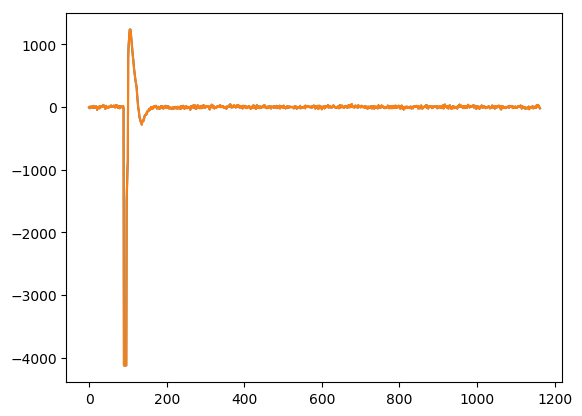

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5bc1515898>

In [35]:
plot(lfpejemplo)
plot(lfpejemplo2)

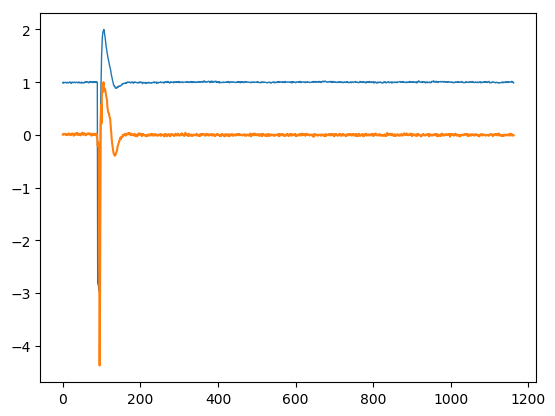

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5c003056d8>

In [44]:
plot(csdejemplo/maximum(csdejemplo)+1,lw=1)
plot(csdejemplo2/maximum(csdejemplo2))

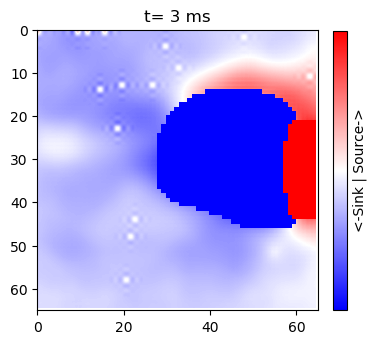

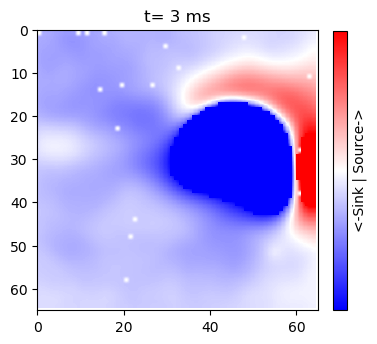

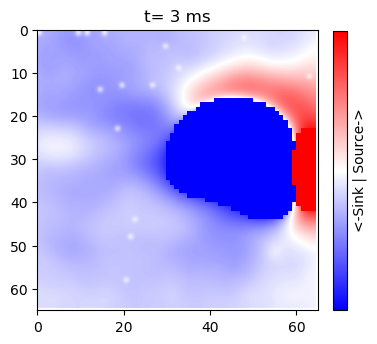

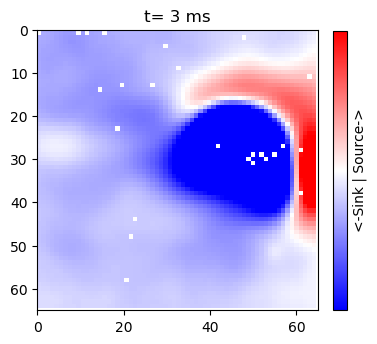

In [47]:
t=140
#ion()
ioff()
lista=("sinc", "hanning", "gaussian", "nearest")
limites=50
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

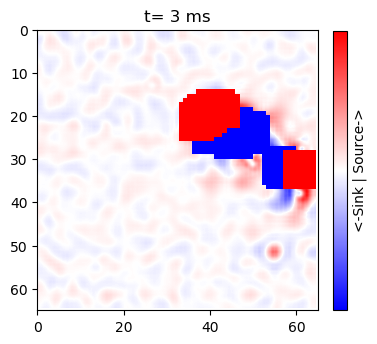

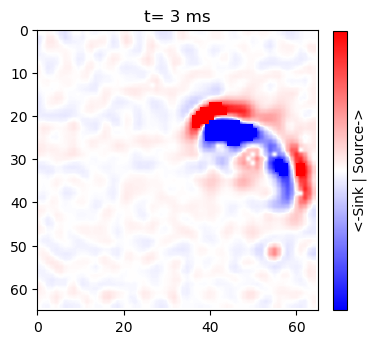

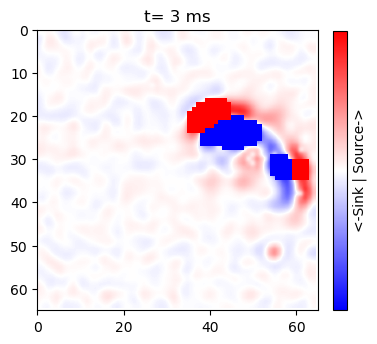

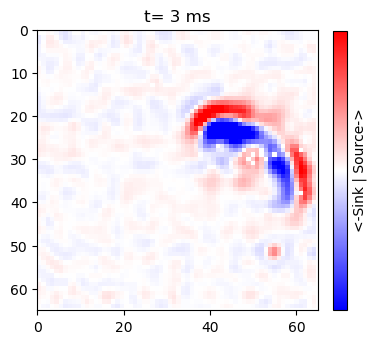

In [48]:
t=140
#ion()
ioff()
lista=("sinc", "hanning", "gaussian", "nearest")
limites=10
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD2[:,:,t]
    tiempo=round(Int,(t-retrazo2)/freq2)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

In [12]:
ioff()
limites=50
inicio=1009
retrazo=inicio
final=1500
paso=1
for t=inicio:paso:final
#t=954
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=@sprintf("%3.2f",(t-retrazo)/freq);
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="gaussian",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSDDifferenceSmooth_140116s2_08_$t.svg",dpi=90)
    close(figura)
end
PyPlot.close_figs()

In [13]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

LoadError: SystemError: opening file ../kCSD/BceroDura-r-0.0675.dat: No existe el fichero o el directorio

In [17]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

LoadError: UndefVarError: bchica not defined

In [18]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

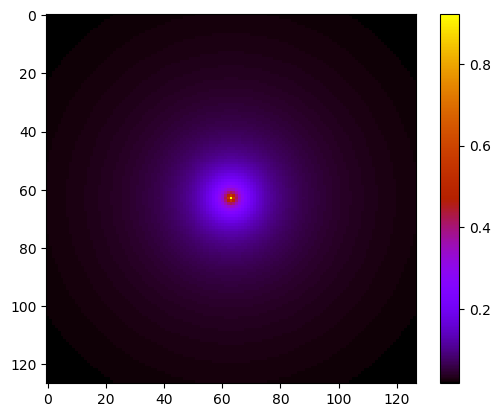

PyObject <matplotlib.colorbar.Colorbar object at 0x7f83bc2baeb8>

In [19]:
aver=imshow(bgrande,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [20]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

LoadError: UndefVarError: bchica not defined

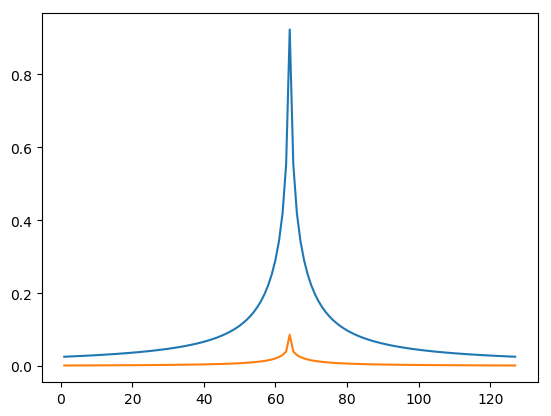

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f07a8c53c50>

In [24]:
plot(1:127,tu)
plot(1:127,te)

In [25]:
bgmin=bgrande/minimum(bgrande)

127x127 Array{Float64,2}:
 1.0      1.00794  1.01595  1.02401  …  1.02401  1.01595  1.00794  1.0    
 1.00794  1.01608  1.02428  1.03255     1.03255  1.02428  1.01608  1.00794
 1.01595  1.02428  1.03269  1.04116     1.04116  1.03269  1.02428  1.01595
 1.02401  1.03255  1.04116  1.04984     1.04984  1.04116  1.03255  1.02401
 1.03213  1.04088  1.0497   1.0586      1.0586   1.0497   1.04088  1.03213
 1.04031  1.04926  1.0583   1.06743  …  1.06743  1.0583   1.04926  1.04031
 1.04854  1.05771  1.06697  1.07632     1.07632  1.06697  1.05771  1.04854
 1.05682  1.06621  1.0757   1.08528     1.08528  1.0757   1.06621  1.05682
 1.06514  1.07476  1.08448  1.0943      1.0943   1.08448  1.07476  1.06514
 1.07351  1.08336  1.09332  1.10339     1.10339  1.09332  1.08336  1.07351
 1.08193  1.09201  1.10221  1.11253  …  1.11253  1.10221  1.09201  1.08193
 1.09037  1.1007   1.11115  1.12172     1.12172  1.11115  1.1007   1.09037
 1.09886  1.10943  1.12013  1.13096     1.13096  1.12013  1.10943  1.09886

In [26]:
cloack=bgmin-brmin

LoadError: UndefVarError: brmin not defined

In [27]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

LoadError: UndefVarError: cloack not defined

In [28]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

LoadError: UndefVarError: KOp not defined

In [29]:
KOp[1:64,1:64]

LoadError: UndefVarError: KOp not defined

# Pruebas de Estabilidad en una submatrix pequeñita

In [14]:
Kdd=readdlm("../kCSD/Krevisarestable.dat")
Ktildedd=readdlm("../kCSD/KTilderevisarestable.dat");

In [15]:
size(Kdd)

(575,575)

In [16]:
sublfp=LFP[41:64,11:34,1000]
saturados=Set{Array{Int,1}}()
push!(saturados, [1,1])

Set(Array{Int64,1}[[1,1]])

In [19]:
writedlm("EjemplitoLFP.dat",sublfp)

In [17]:
saturados

Set(Array{Int64,1}[[1,1]])

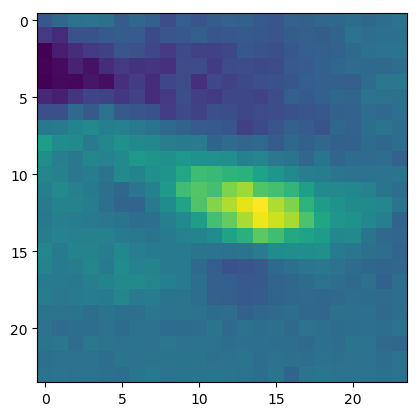

PyObject <matplotlib.image.AxesImage object at 0x7f6f5ec07be0>

In [18]:
imshow(sublfp)

In [20]:
include("../CSDA/LindenbergOperadores.jl")
importall LindenbergOperadores

In [21]:
aux1=GaussianSmooth(sublfp);
aux2=DiscreteLaplacian(aux1);
dcsd=-aux2;

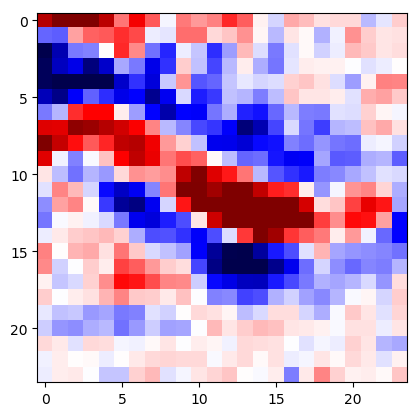

PyObject <matplotlib.image.AxesImage object at 0x7f6f5f03d128>

In [24]:
writedlm("EjemplitodCSD.dat",dcsd)
vlim=100
imshow(dcsd,cmap="seismic",vmin=-vlim,vmax=vlim)

In [25]:
todaslasX=Array[]

ncuad=24
Ntot=ncuad^2

for j=1:ncuad,k=1:ncuad
    push!(todaslasX,[j,k])
end

xpurgadas=filter(q->!(q in saturados), todaslasX)
nbuenas=length(xpurgadas)

CSDtentativa=zeros(Ntot)
CSD=zeros(sublfp)

lfpv=zeros(nbuenas)

println("Acomodando los LFP correctos")

for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    lfpv[j]=sublfp[renglon,columna]
end


Acomodando los LFP correctos


In [26]:
rangolambda=20


CSD=zeros(Float64,ncuad,ncuad,rangolambda)
CSDTentativa=zeros(nbuenas,rangolambda)

#nbuenas es la long de la diagonal!!!
## y de cualquier lado de la matriz, daah..
KLambda=deepcopy(Kdd)
KTT=zeros(Kdd)

intervalo=0.2


for l=1:rangolambda
     KLambda=deepcopy(Kdd)
    lambda=l/(rangolambda)
    println(lambda, " ",KLambda[8,8])
    for j=1:nbuenas
       
        KLambda[j,j]=KLambda[j,j]/2.0*(1.0+intervalo*lambda)
    
        KTT=transpose(Ktildedd)*inv(KLambda)
    end
    println(lambda, ",", KTT[8,8], " ", KLambda[8,8])
    CSDTentativa[:,l]=KTT*lfpv 
    
end


for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    CSD[renglon,columna,:]=CSDTentativa[j,:]
end


println("terminando calculo")
writedlm("EjemplitokCSD.dat",CSD)

0.05 110.126614487913
0.05,-0.280373586855922 55.61394031639607
0.1 110.126614487913
0.1,-0.15116678901292757 56.164573388835635
0.15 110.126614487913
0.15,-0.0995751268833115 56.715206461275194
0.2 110.126614487913
0.2,-0.07224736757423307 57.26583953371476
0.25 110.126614487913
0.25,-0.055523760594174125 57.81647260615433
0.3 110.126614487913
0.3,-0.04433716108480264 58.367105678593894
0.35 110.126614487913
0.35,-0.03638624526605372 58.91773875103346
0.4 110.126614487913
0.4,-0.030480028014548844 59.46837182347303
0.45 110.126614487913
0.45,-0.02594268183182516 60.01900489591259
0.5 110.126614487913
0.5,-0.022363406330912463 60.569637968352154
0.55 110.126614487913
0.55,-0.019478789299167076 61.12027104079172
0.6 110.126614487913
0.6,-0.017112540770962754 61.67090411323129
0.65 110.126614487913
0.65,-0.015142465241273712 62.22153718567084
0.7 110.126614487913
0.7,-0.013481344166215988 62.77217025811041
0.75 110.126614487913
0.75,-0.012065357469442638 63.322803330549974
0.8 110.126614

In [42]:
intervalo=(1,1.2)
save("EjemploskCSD.jld", "CSD", CSD)

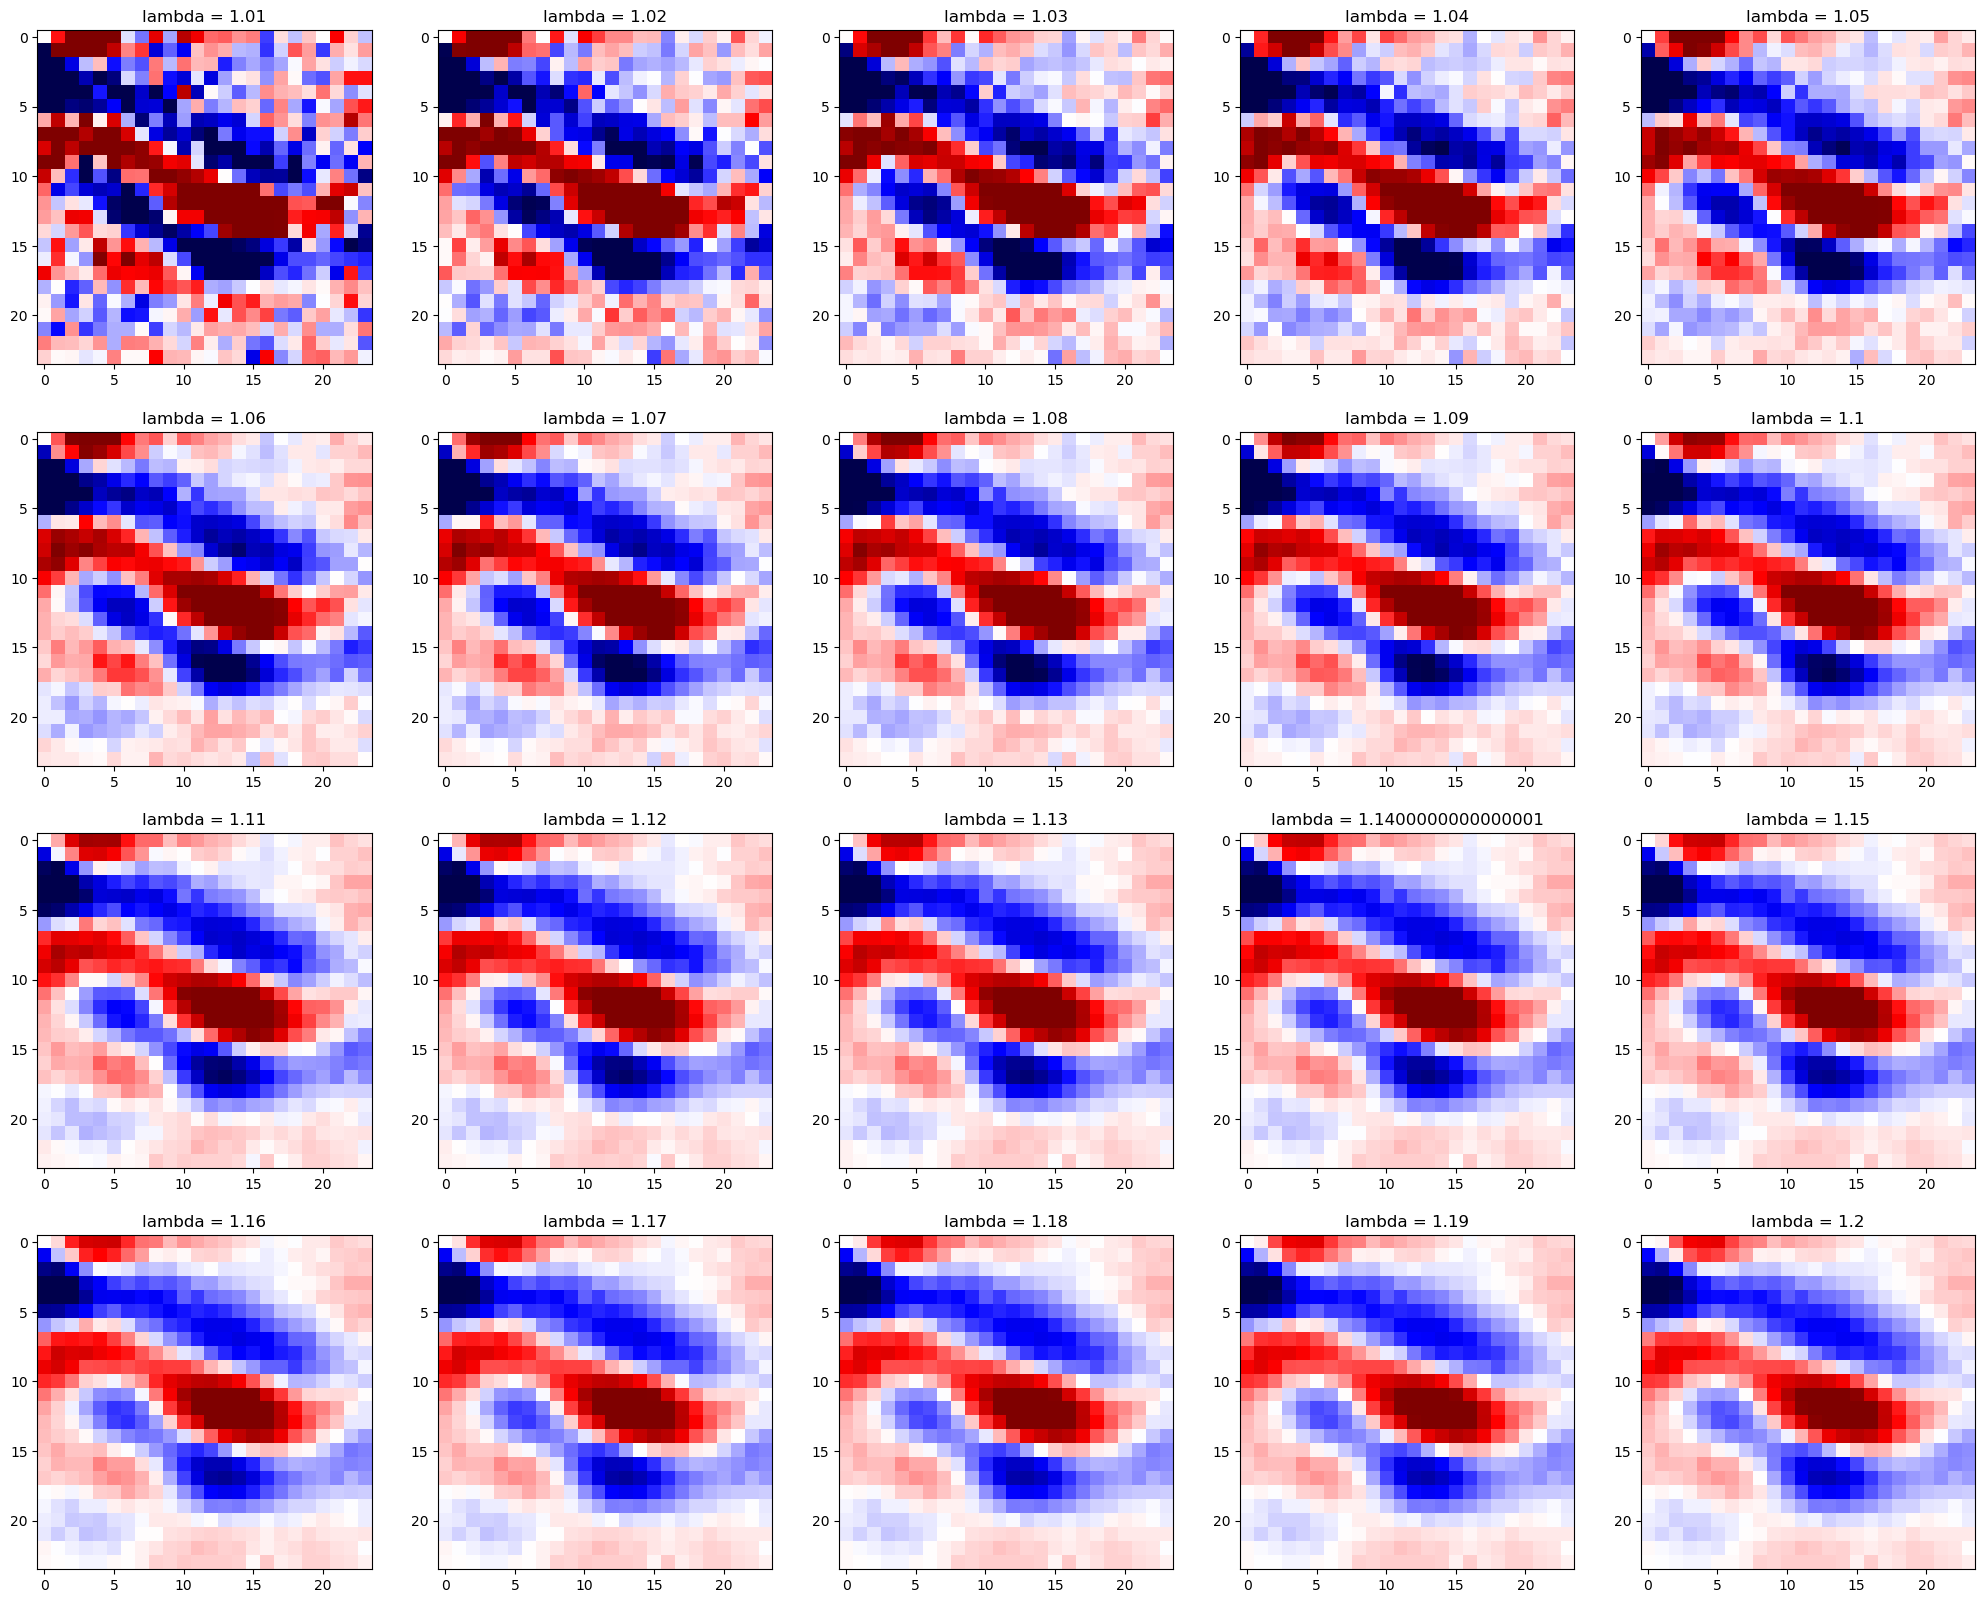

In [33]:
farofa, lista=subplots(4,5, figsize=(25,20))
vlim=40
intervalo=0.2
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    reallambda=(1+intervalo*j/rangolambda)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](CSD[:,:,j],cmap="seismic",vmin=-vlim,vmax=vlim)
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
savefig("VarioskCSD03.png",dpi=92)

In [113]:
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    if pa==0; pa=5 ; end
    println(pu," ",pa)
end

1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 5
3 1
3 2
3 3
3 4
3 5
4 1
4 2
4 3
4 4
4 5
